# IPD et Machine learning

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Contributeurs : Louisa Fodil (CRISTAL/SMAC), Céline Petitpré (CRISTAL/SMAC)

Creation : 18/01/2018

## Introduction

Le Dilemme itéré du prisonnier permet d'exprimer une infinité de stratégies. Il est naturel de se demander laquelle est la meilleure ? Malheureusement il n'y a pas de stratégie meilleure dans l'absolu. On ne peut par exemple pas jouer optimalement contre `All_D` et `Spiteful`. Ceci est du au fait qu'il s'agit d'un jeu simultané, et qu'au premier coup, on ne connait pas encore son adversaire. Il faut donc choisir. Il y a par contre des stratégie plus "robustes" que d'autres, au sens où elles sont toujours efficaces dans des environnements variés.
Les compétitions écologiques et les sous-classes sont des moyens de faire varier légèrement l'environnement.
Resste maintenant à trouver de bonnes stratégies.
Nous cherchons ici à savoir quels sont les outils qui nous permettent d'identifier de nouvelles stratégies robustes et notamment si les techniques d'Intelligence Artificielles peuvent nous être utiles pour les mettre en évidence.

Dans ce notebook nous considérons comme acquis tous les outils précédemment créés et que nous savons évaluer un ensemble de stratégies par compétition écologique. 

In [1]:
# All about simultaneous games (class Game with getNash(), getPareto(), getDominantStrategies())
%run Game.py

# All about ipd (Meeting, Tournament and Ecological classes)
%run ipd.py

# All about strategies (getPeriodics(), getMem(X,Y), getClassicals() with run() method)
run strategies.py


SyntaxError: invalid syntax (<ipython-input-1-2f2b503d5a88>, line 8)

# Apprendre des stratégies

A partir d'ici on considère qu'on sait faire des tournois , compétitions et sous-classes
et qu'on a a disposition des ensembles de stratégies définies avec génotype. Ce qu'on cherche, c'est trouver des bonnes stratégies
- methodes de monte carlo
- algos génétiques
- et tout ce que l'on peut faire de mieux (jouer sur les fonctions de fitness , faire du reinforcement learning, des reseaux de neurones etc ...)

# Methode de Monte-Carlo

## Battre une classe mem
Il est très souvent (toujours ?) possible de trouver une stratégie capable de battre toutes celles d'une classe données dans une classe d'ordre supérieur. Par exemple trouver une `Mem(2,2)` capable de gagner dans l'ensemble des `Mem(1,1)`. La manière la plus simple d'en trouver une consiste à calculer un certain nombre de fois un génotype aléatoire d'une `Mem(2,2)`, de l'évaluer dans `Mem(1,1)`, de regarder son classement et de ne conserver que celle qui a obtenu le meilleur classement. C'est le cas de `Mem(2,2,'CCCCDDDCCDCDDDDDDD')`.

In [ ]:
class FindBest:
    def __init__(self, game):
        self.game = game

    def generate_random_genotype(self, x, y):
        N = max(x,y) + 2**(x+y)
        genotype = ""
        for i in range (N):
            genotype += random.choice(self.game.actions)
        return genotype

    def random_selection(self, x, y, nb_tests, soupe):
        d = dict()
        for n in range(nb_tests):
            genotype = self.generate_random_genotype(x,y)
            strat = Mem(x,y,genotype)
            eco = Ecological(self.game, soupe+[strat])
            eco.run()
            d[genotype] = eco.historic.columns.tolist().index(strat.name)
        return sorted(d.items(), key=lambda t: t[1])


dip =[(3,3),(0,5),(5,0),(1,1)]
g = Game(dip,['C','D'])
gen = FindBest(g)
soupe = getAllMemory(1,1)
print(gen.random_selection(2,2,10,soupe)[1:3])

In [ ]:
## Battre Mem(1,1) par Mem(2,2)

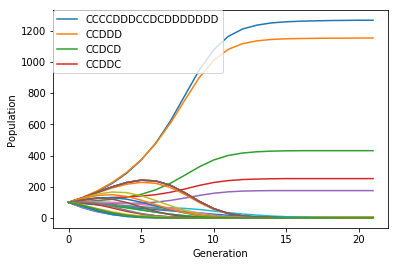

CCCCDDDCCDCDDDDDDD    1267
CCDDD                 1153
CCDCD                  431
CCDDC                  252
CCDCC                  175
CCCCC                    5
CCCCD                    5
CCCDC                    5
CCCDD                    5
Name: 21, dtype: object


In [33]:
bag3=getAllMemory(1,1)
e2=Ecological(g,bag3+[Mem(2,2,'CCCCDDDCCDCDDDDDDD')])
e2.run()
e2.drawPlot(None,4)
evol=e2.historic
print(evol.iloc[-1][evol.iloc[-1]>0])

## Algo Génétique

Les techniques de Monte-Carlo sont simples à comprendre mais lentes à converger. Les algorithmes génétiques sont bien plus performants pour ce type de rechercher. A l'aide de la librairie [Deap](https://deap.readthedocs.io/en/master/), trouver la meilleure stratégie `mem(3,3)` qui est la meilleure face à `mem(1,1)`

Malheureusement les stratégies trouvées pour surperformer contre une classe donnée sont particulièrement bien adaptées à cette classe mais très peu robustes. En changeant ne serait-ce qu'une stratégie dans l'ensemble initiale, elles ne surperforment plus.
On étudie ici une stratégie obtenue par algorithme génétique face à toutes les sous-classes de taille (n-1)

## Approche neuronale (Caffe ? TensorFlow ? Keras ?)

# Bibliographie

- Robert Axelrod, The Evolution of Cooperation (New York: Basic Books, 1984).
- JP Delahaye et P Mathieu. Des surprises dans le monde de la coopération. Pour la Science, numéro spécial "Les mathématiques sociales", pp 58-66, Juillet 1999.
- Philippe Mathieu, Jean-Paul Delahaye. [New Winning Strategies for the Iterated Prisoner's Dilemma](http://jasss.soc.surrey.ac.uk/20/4/12.html). J. Artificial Societies and Social Simulation 20(4) (2017)
- Philippe Mathieu, Jean-Paul Delahaye. New Winning Strategies for the Iterated Prisoner's Dilemma. AAMAS 2015: 1665-1666
- Bruno Beaufils, Jean-Paul Delahaye et Philippe Mathieu. Our Meeting with Gradual : A good Strategy for the Itareted Prisoner’s Dilemma, in Intern. Cof. on Artificial Life V (ALIFE V), pp. 159- 165, 16-18 mai 1996, Nara (Japon).
- Martin Nowak et K. Sigmund, TIT for TAT in Heterogeneous Populations, Nature, vol. 355, n° 16, pp. 250-253, janvier 1992.